The difference between the 1D and 2D diffusion equations is similar to that of the difference in the convection equations - we just add a second dimensional term. This results in the following equation, with v as the viscosity:

$$ \frac{\delta u}{\delta t} = v \frac{\delta^2 u}{\delta x^2} + v \frac{\delta^2 u}{\delta y^2}$$

After discretising with the finite difference method, and solving for the next term in time for a given position, we get the following update equation:

$$u_{i,j}^{n+1} = u_{i,j}^n - + v\frac{\Delta t}{\Delta x^2} (u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n) + v\frac{\Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n) $$


The same boundary and initial conditions will be used

In [1]:
#Importing packages

#Plotting library that is new to me
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#Declare parameter variables

nx = 101 #Number of x points
ny = 101 #Number of y points
steps = 100 #Number of time steps to simulate
v = 0.05 #Viscosity

dx = 2 / (nx - 1) #Difference in x between x points
dy = 2 / (ny - 1) #Difference in y between y points
sigma = 0.25 #Not sure yet - defines the time step
dt = sigma * dx * dy / v #Difference in time between time steps

#Create grid
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

#Holds current grid conditions in a matrix
u = np.ones((nx, ny))

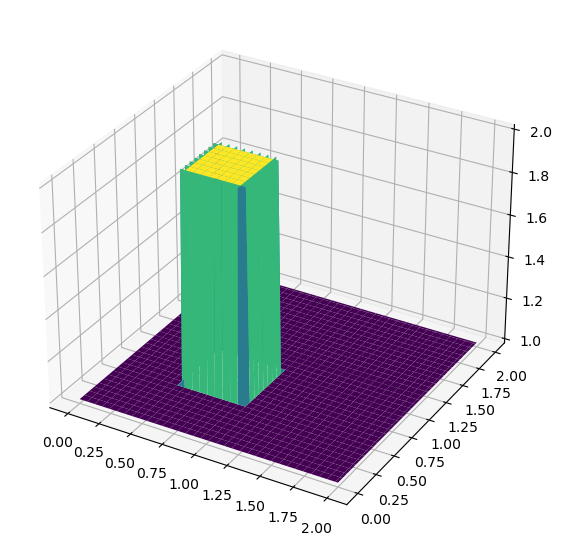

In [3]:
#Initial conditions
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

#Display intial condition
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [4]:
#Update code
def update(u, v, dt, dx, dy):
    unext = u.copy()
    
    #Update with update rule and numpy matrix operations
    unext[1:-1, 1:-1] = (u[1:-1,1:-1] + 
                    v * dt / dx**2 * 
                    (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, 0:-2]) +
                    v * dt / dy**2 * 
                    (u[2:,1: -1] - 2 * u[1:-1, 1:-1] + u[0:-2, 1:-1]))    
    
    
    #Specify boundary conditions
    
    unext[0,:] = 1
    unext[-1,:] = 1
    unext[:,0] = 1
    unext[:,-1] = 1
    
    return unext

In [5]:
#Initialising function
def initialise(nx, ny, dy, dx):
    u = np.ones((nx, ny))
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    
    
    return u

In [6]:
#Complete function to diffuse from the initial conditions for n steps and plot the result
def diffuse(steps, v=v, dt=dt, dx=dx, dy=dy, nx=nx, ny=ny):
    #Create initial conditions
    u = initialise(nx, ny, dy, dx)
    
    #Iteratively update
    for i in range(steps):
        u = update(u, v, dt, dx, dy)
        
    #Display result
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)                            
    surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

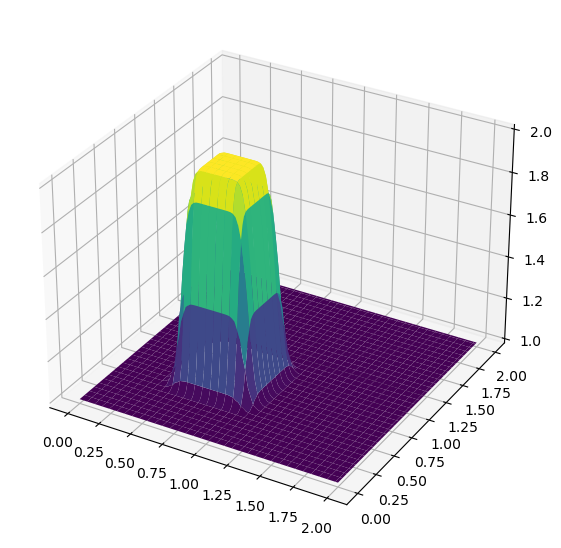

In [7]:
diffuse(10)

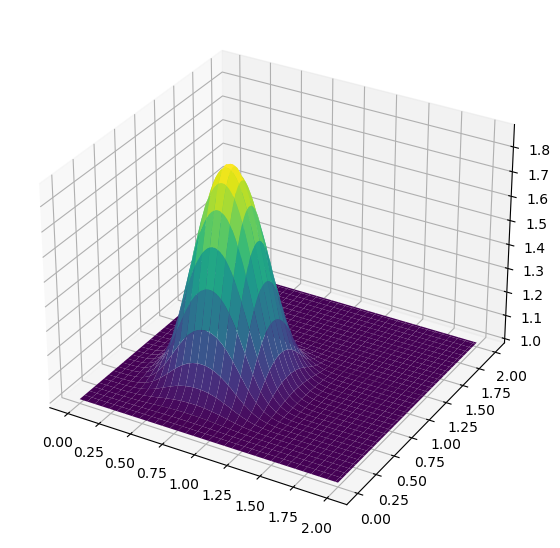

In [8]:
diffuse(100)

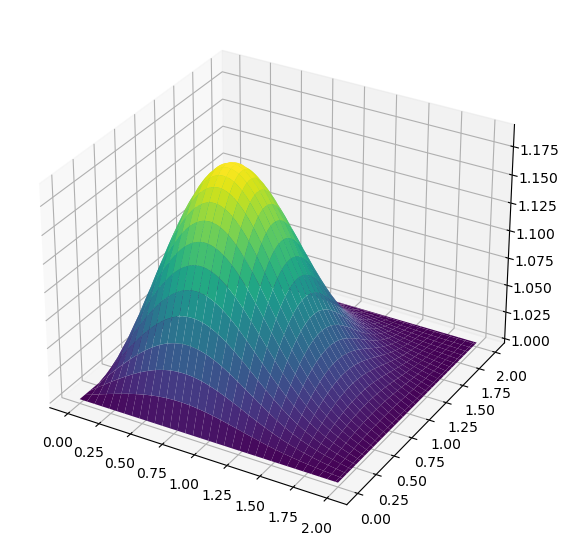

In [9]:
diffuse(1000)

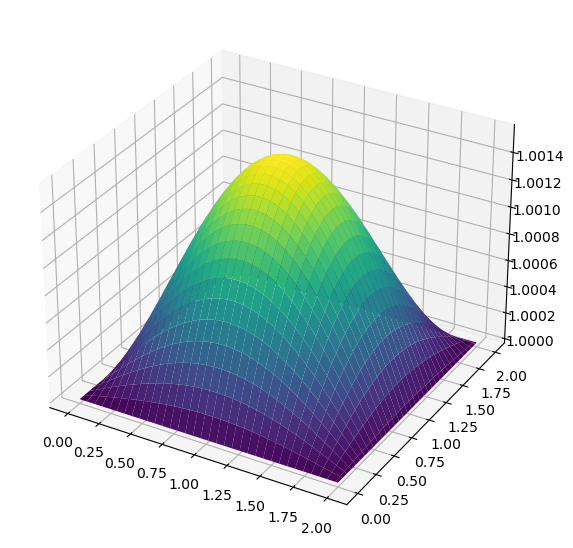

In [10]:
diffuse(10000)